In [1]:
#画图
import matplotlib as mpl 
import matplotlib.pyplot as plt
#在notebook里画图
%matplotlib inline
import numpy as np
import sklearn
#处理数据
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl,np,pd,sklearn,tf,keras:
    print(module.__name__,module.__version__)



2.0.0
sys.version_info(major=3, minor=7, micro=9, releaselevel='final', serial=0)
matplotlib 3.3.4
numpy 1.19.2
pandas 1.2.1
sklearn 0.23.2
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid,x_train = x_train_all[:5000],x_train_all[5000:]
y_valid,y_train = y_train_all[:5000],y_train_all[5000:]

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
print(np.max(x_train),np.min(x_train))

255 0


In [4]:
# x = (x-u均值)/ std方差
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [5]:
print(np.max(x_train_scaled),np.min(x_train_scaled))

2.0231433 -0.8105136


In [8]:
# tf.keras.models.Sequential
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
for _ in range(20):
    model.add(keras.layers.Dense(100,activation="relu"))
    """
    model.add(keras.layers.Dense(100))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation(relu))
    """
model.add(keras.layers.Dense(10,activation="softmax"))


In [9]:
model.summary()
#如果y 只是一个数就是用sparse_.. 如果y是一个向量就使用categorical_crossentropy
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)              

In [10]:
history=model.fit(x_train_scaled,y_train,epochs=10,validation_data=(x_valid_scaled,y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 18s 336us/sample - loss: 1.8823 - accuracy: 0.2835 - val_loss: 0.9884 - val_accuracy: 0.5706
Epoch 2/10
55000/55000 [==============================] - 16s 299us/sample - loss: 0.7490 - accuracy: 0.7028 - val_loss: 0.5972 - val_accuracy: 0.7792
Epoch 3/10
55000/55000 [==============================] - 17s 304us/sample - loss: 0.5495 - accuracy: 0.7959 - val_loss: 0.6024 - val_accuracy: 0.7948
Epoch 4/10
55000/55000 [==============================] - 17s 307us/sample - loss: 0.4729 - accuracy: 0.8315 - val_loss: 0.4452 - val_accuracy: 0.8426
Epoch 5/10
55000/55000 [==============================] - 17s 309us/sample - loss: 0.4297 - accuracy: 0.8500 - val_loss: 0.4193 - val_accuracy: 0.8572
Epoch 6/10
55000/55000 [==============================] - 17s 310us/sample - loss: 0.4017 - accuracy: 0.8633 - val_loss: 0.4180 - val_accuracy: 0.8562
Epoch 7/10
55000/55000 [=====================

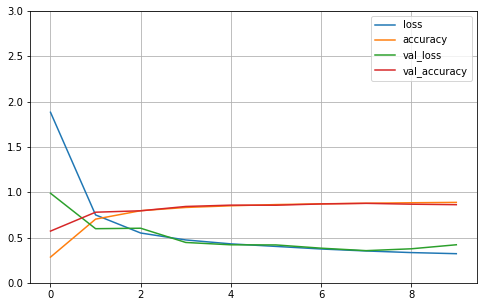

In [11]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,3)
    plt.show()
    
plot_learning_curves(history)
#1. 参数众多 训练不充分
#2. 梯度消失 -> 链式法则 -> 复合函数f(g(x))

In [12]:
model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[37.28961868438721, 0.6622]